In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import sys
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
base_dir = '/content/drive/My Drive/SKIN_CANCER'

train_dir= os.path.join(base_dir,'Train')
test_dir= os.path.join(base_dir,'Test')

ack_train_dir=os.path.join(train_dir, 'actinic keratosis')
bcc_train_dir=os.path.join(train_dir,'basal cell carcinoma')
drmf_train_dir=os.path.join(train_dir,'dermatofibroma')
mel_train_dir=os.path.join(train_dir,'melanoma')
nev_train_dir=os.path.join(train_dir,'nevus')
pgk_train_dir=os.path.join(train_dir,'pigmented benign keratosis')
sbk_train_dir=os.path.join(train_dir,'seborrheic keratosis')
scc_train_dir=os.path.join(train_dir,'squamous cell carcinoma')
vsl_train_dir=os.path.join(train_dir,'vascular lesion')

ack_test_dir=os.path.join(test_dir, 'actinic keratosis')
bcc_test_dir=os.path.join(test_dir,'basal cell carcinoma')
drmf_test_dir=os.path.join(test_dir,'dermatofibroma')
mel_test_dir=os.path.join(test_dir,'melanoma')
nev_test_dir=os.path.join(test_dir,'nevus')
pgk_test_dir=os.path.join(test_dir,'pigmented benign keratosis')
sbk_test_dir=os.path.join(test_dir,'seborrheic keratosis')
scc_test_dir=os.path.join(test_dir,'squamous cell carcinoma')
vsl_test_dir=os.path.join(test_dir,'vascular lesion')





In [ ]:
num_ack_train_dir = len(os.listdir(ack_train_dir))
num_bcc_train_dir = len(os.listdir(bcc_train_dir))
num_drmf_train_dir = len(os.listdir(drmf_train_dir))
num_mel_train_dir = len(os.listdir(mel_train_dir))
num_nev_train_dir = len(os.listdir(nev_train_dir))
num_pgk_train_dir = len(os.listdir(pgk_train_dir))
num_sbk_train_dir = len(os.listdir(sbk_train_dir))
num_scc_train_dir = len(os.listdir(scc_train_dir))
num_vsl_train_dir = len(os.listdir(vsl_train_dir))

num_ack_test_dir = len(os.listdir(ack_test_dir))
num_bcc_test_dir = len(os.listdir(bcc_test_dir))
num_drmf_test_dir = len(os.listdir(drmf_test_dir))
num_mel_test_dir = len(os.listdir(mel_test_dir))
num_nev_test_dir = len(os.listdir(nev_test_dir))
num_pgk_test_dir = len(os.listdir(pgk_test_dir))
num_sbk_test_dir = len(os.listdir(sbk_test_dir))
num_scc_test_dir = len(os.listdir(scc_test_dir))
num_vsl_test_dir = len(os.listdir(vsl_test_dir))

total_train = num_ack_train_dir + num_bcc_train_dir + num_drmf_train_dir + num_mel_test_dir + num_nev_train_dir + num_pgk_train_dir + num_sbk_train_dir + num_scc_train_dir + num_vsl_train_dir
total_test = num_ack_test_dir + num_bcc_test_dir + num_drmf_test_dir + num_mel_test_dir + num_nev_test_dir + num_pgk_test_dir + num_sbk_test_dir + num_scc_test_dir + num_vsl_test_dir 

print('total training actinic keratosis:', num_ack_train_dir)
print('total training basal cell carcinoma:', num_bcc_train_dir)
print('total training dermatofibroma:', num_drmf_train_dir)
print('total training melanoma:', num_mel_train_dir)
print('total training nevus:', num_nev_train_dir)
print('total training pigmented benign keratosis:', num_pgk_train_dir)
print('total training seborrheic keratosis:', num_sbk_train_dir)
print('total training squamous cell carcinoma:', num_scc_train_dir)
print('total training vascular lesion:', num_vsl_train_dir)
print("------")
print('total testing actinic keratosis:', num_ack_test_dir)
print('total testing basal cell carcinoma:', num_bcc_test_dir)
print('total testing dermatofibroma:', num_drmf_test_dir)
print('total testing melanoma:', num_mel_test_dir)
print('total testing nevus:', num_nev_test_dir)
print('total testing pigmented benign keratosis:', num_pgk_test_dir)
print('total testing seborrheic keratosis:', num_sbk_test_dir)
print('total testing squamous cell carcinoma:', num_scc_test_dir)
print('total testing vascular lesion:', num_vsl_test_dir)
print("---")

print("total training data", total_train)
print("total testing data", total_test)






total training actinic keratosis: 114
total training basal cell carcinoma: 376
total training dermatofibroma: 95
total training melanoma: 438
total training nevus: 357
total training pigmented benign keratosis: 462
total training seborrheic keratosis: 77
total training squamous cell carcinoma: 181
total training vascular lesion: 139
------
total testing actinic keratosis: 16
total testing basal cell carcinoma: 16
total testing dermatofibroma: 16
total testing melanoma: 16
total testing nevus: 16
total testing pigmented benign keratosis: 16
total testing seborrheic keratosis: 3
total testing squamous cell carcinoma: 16
total testing vascular lesion: 3
---
total training data 1817
total testing data 118


In [ ]:
train_image_generator=ImageDataGenerator(rescale=1./255,
                                         rotation_range= 45,
                                         width_shift_range=.15,
                                         height_shift_range=.15,
                                         zoom_range=0.5,
                                         horizontal_flip= True,
                                         vertical_flip= False)
print(train_image_generator)

In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size= 5,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(150,150),
                                                           class_mode='binary',
                                                           color_mode='rgb')

test_data_gen = test_image_generator.flow_from_directory(batch_size=5,
                                                         directory = test_dir,
                                                         target_size=(150,150),
                                                         class_mode='binary',
                                                         color_mode='rgb')


Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
def classLabel(source=None):
  datagen = ImageDataGenerator(rescale=1. /255)
  data_generator = datagen.flow_from_directory(
  source)
  class_dictionary = data_generator.class_indices
  return data_generator, class_dictionary
  
labels = classLabel(train_dir)
print(labels)  

Found 2239 images belonging to 9 classes.
(<keras.preprocessing.image.DirectoryIterator object at 0x7f465f5f7d90>, {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8})


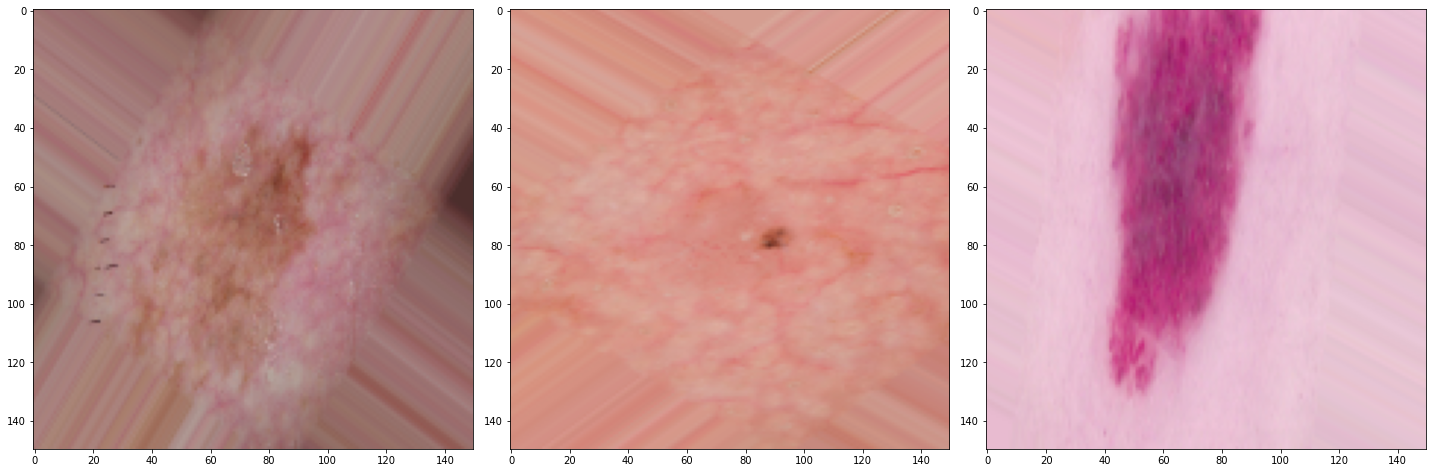

In [ ]:
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
  fig, axes= plt.subplots(1,3,figsize=(20,20))
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImages(sample_training_images[:3])


In [ ]:
model = Sequential()
model.add(Conv2D(16,3, padding='same',activation='relu',input_shape=(150,150,3,)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Conv2D(32,3, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32,3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(9,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        9

In [ ]:
history = model.fit_generator(
           train_data_gen,
           validation_data = test_data_gen,
           steps_per_epoch = 3,
           epochs=100,
           validation_steps = 9,
           verbose = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
3/3 - 23s - loss: 6.5654 - accuracy: 0.0667 - val_loss: 2.8383 - val_accuracy: 0.1333 - 23s/epoch - 8s/step
Epoch 2/100
3/3 - 17s - loss: 3.4225 - accuracy: 0.2000 - val_loss: 2.2875 - val_accuracy: 0.1556 - 17s/epoch - 6s/step
Epoch 3/100
3/3 - 15s - loss: 2.3013 - accuracy: 0.0667 - val_loss: 2.2156 - val_accuracy: 0.0667 - 15s/epoch - 5s/step
Epoch 4/100
3/3 - 9s - loss: 2.1122 - accuracy: 0.2667 - val_loss: 2.2020 - val_accuracy: 0.0667 - 9s/epoch - 3s/step
Epoch 5/100
3/3 - 10s - loss: 2.1283 - accuracy: 0.2667 - val_loss: 2.1875 - val_accuracy: 0.1556 - 10s/epoch - 3s/step
Epoch 6/100
3/3 - 6s - loss: 2.1143 - accuracy: 0.2667 - val_loss: 2.1867 - val_accuracy: 0.1556 - 6s/epoch - 2s/step
Epoch 7/100
3/3 - 9s - loss: 2.1259 - accuracy: 0.3333 - val_loss: 2.1905 - val_accuracy: 0.1778 - 9s/epoch - 3s/step
Epoch 8/100
3/3 - 7s - loss: 2.2103 - accuracy: 0.0667 - val_loss: 2.1883 - val_accuracy: 0.2000 - 7s/epoch - 2s/step
Epoch 9/100
3/3 - 8s - loss: 2.0765 - accuracy: 

In [ ]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,'r', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Testing loss')
plt.title('training and testing loss')
plt.legend(loc=0)
plt.figure()

plt.show

NameError: ignored